In [6]:
import numpy as np

from gradvi.normal_means import NormalMeansFromPosterior as NMFromPost
from gradvi.normal_means import NormalMeans
from gradvi.tests import toy_data, toy_priors

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

In [25]:
priors = toy_priors.get_all(k = 10, skbase = 10., sparsity = 0.3)
prior = priors[0]
z, sj2, s2, dj = toy_data.get_normal_means(prior, n = 100)
n = z.shape[0]
nm1 = NormalMeans.create(z, prior, sj2, scale = s2, d = dj) 
b   = nm1.analytical_posterior_mean

In [26]:
bracket = [b + 10 * b, b - 10 * b]
znew = NMFromPost(b, prior, sj2, scale = s2, d = dj, method = 'trisection', maxiter = 50, bracket = bracket)

In [27]:
bracket

[array([-7.42609410e-01, -1.26982734e+00, -1.06452536e+01, -2.36569679e-01,
         4.32630351e+01,  5.34522744e-02, -3.15531503e-01,  3.13756177e+01,
        -1.33654116e+01,  9.27889581e+01,  3.01306108e+01, -6.47732618e+01,
        -1.44260318e+01, -6.95670104e-01,  5.93250078e+01,  3.48211423e-01,
        -5.91400623e-02, -1.13593980e-01,  5.29903128e-01, -7.37854424e+01,
         9.92286699e+01, -6.68124432e-01,  3.31388288e+01, -3.24253038e+01,
        -3.19524208e+00,  1.13188834e+01, -1.79635065e+00, -9.87099142e+00,
        -2.55449677e+01,  2.47319267e-03, -1.04713914e+01,  2.78030406e+01,
         5.18226481e-01,  1.75643741e-01,  2.03627634e-01, -2.43655403e+00,
         5.47216985e+01, -8.33442489e-01, -7.98338650e+00,  5.02217109e-03,
         1.17046466e-01,  2.21319819e+00, -2.35538726e+00,  2.48932884e+01,
         1.59884807e+01, -3.58239372e-02, -5.60760961e+01, -4.28876113e-02,
        -3.19510526e-01, -6.29572423e+00,  4.46859694e+01, -8.93456026e+01,
         6.1

In [28]:
znew.invert_postmean()
znew.response

array([-1.77971924e-01, -2.23742192e-01, -9.79118142e-01, -9.32221737e-02,
        3.93824553e+00, -4.37336791e-02, -1.12944368e-01,  2.85841370e+00,
       -1.22522920e+00,  8.43984595e+00,  2.74536398e+00, -5.89310537e+00,
       -1.32121195e+00, -1.72728896e-01,  5.39790230e+00,  1.20001709e-01,
       -2.83219023e-02, -5.18688656e-02,  1.51389139e-01, -6.71229806e+00,
        9.02529361e+00, -1.69510374e-01,  3.01853483e+00, -2.95373564e+00,
       -3.39628412e-01,  1.04001964e+00, -2.57986781e-01, -9.09251174e-01,
       -2.32906314e+00, -2.02352128e-03, -9.63413899e-01,  2.53404164e+00,
        1.49676314e-01, -1.43708515e-01, -1.66604428e-01, -2.94932348e-01,
        4.97952548e+00, -1.87374662e-01, -7.40158065e-01, -4.10904908e-03,
       -9.57652905e-02,  2.82236377e-01, -2.90321174e-01,  2.26991368e+00,
        1.46261014e+00, -1.73754262e-02, -5.10261836e+00, -2.07338274e-02,
       -1.13834082e-01, -5.90798345e-01,  4.06753701e+00, -8.12680934e+00,
       -5.04221905e-02, -

In [33]:
znew.response - znew._bracket[1]

array([-5.64586108e-07, -1.78780709e-08, -9.99173098e-08, -5.39572833e-07,
       -1.35356915e-07,  0.00000000e+00, -1.19945089e-07, -9.81647919e-08,
       -2.09081596e-08, -3.22565015e-08, -3.14231818e-08, -3.37759829e-08,
       -4.51346782e-08, -5.87666008e-08, -6.18699856e-08, -1.32367924e-07,
       -2.02331747e-07, -7.77262231e-07, -4.47634668e-08, -3.84753784e-08,
       -3.44951552e-08, -5.07957168e-07, -3.45604487e-08, -1.01448942e-07,
       -8.99724907e-08, -1.06240060e-07, -8.43035458e-09, -4.63250077e-08,
       -7.99224562e-08,  0.00000000e+00, -3.27618078e-08, -4.34936411e-08,
       -1.31331253e-07,  0.00000000e+00,  0.00000000e+00, -2.28697158e-08,
       -1.54086839e-06, -1.05607346e-07, -7.49327853e-08,  0.00000000e+00,
        0.00000000e+00, -1.03866389e-08, -1.98970895e-07, -3.89417747e-08,
       -5.00231072e-08, -1.22561924e-07, -8.77225483e-08, -2.93456753e-07,
       -8.09717741e-08, -8.86383528e-08, -2.33014736e-08, -1.55297375e-08,
        0.00000000e+00, -

In [35]:
znew._binvobj

     fun: array([-1.28957788e-08,  4.59492240e-09,  7.83172371e-09, -2.05579484e-09,
        6.10520789e-09, -1.33977914e-02,  1.07228298e-08,  5.80266724e-09,
        2.09288875e-09, -3.01201553e-09,  2.98445713e-10, -8.04983102e-09,
       -8.23268564e-09,  2.35785395e-09,  1.37842866e-08, -7.31363012e-09,
       -2.03217457e-09, -1.24732370e-08, -6.69078417e-09,  1.42725609e-08,
       -7.42531547e-09,  6.07036028e-09, -2.27374830e-09, -6.18551965e-09,
       -6.24039165e-09, -1.33248694e-08,  2.82523241e-09,  1.06173973e-08,
       -1.23560184e-08, -6.01240821e-04,  1.54777646e-09,  2.93666735e-09,
        3.21938994e-09, -5.95375058e-02, -7.70626510e-02,  3.32294428e-09,
       -6.22789553e-09,  1.28956733e-08, -5.15893672e-09, -1.22115479e-03,
       -3.29896820e-02, -6.00997585e-10, -8.79028364e-09,  3.40761463e-09,
        9.48945655e-09,  8.83216750e-09, -4.35324488e-09,  8.99002885e-09,
       -2.64437119e-09,  1.06234183e-08, -8.03062061e-09,  6.93236046e-09,
       -1.56039

In [36]:
np.sum(np.square(znew._binvobj.fun))

0.02024243728841878

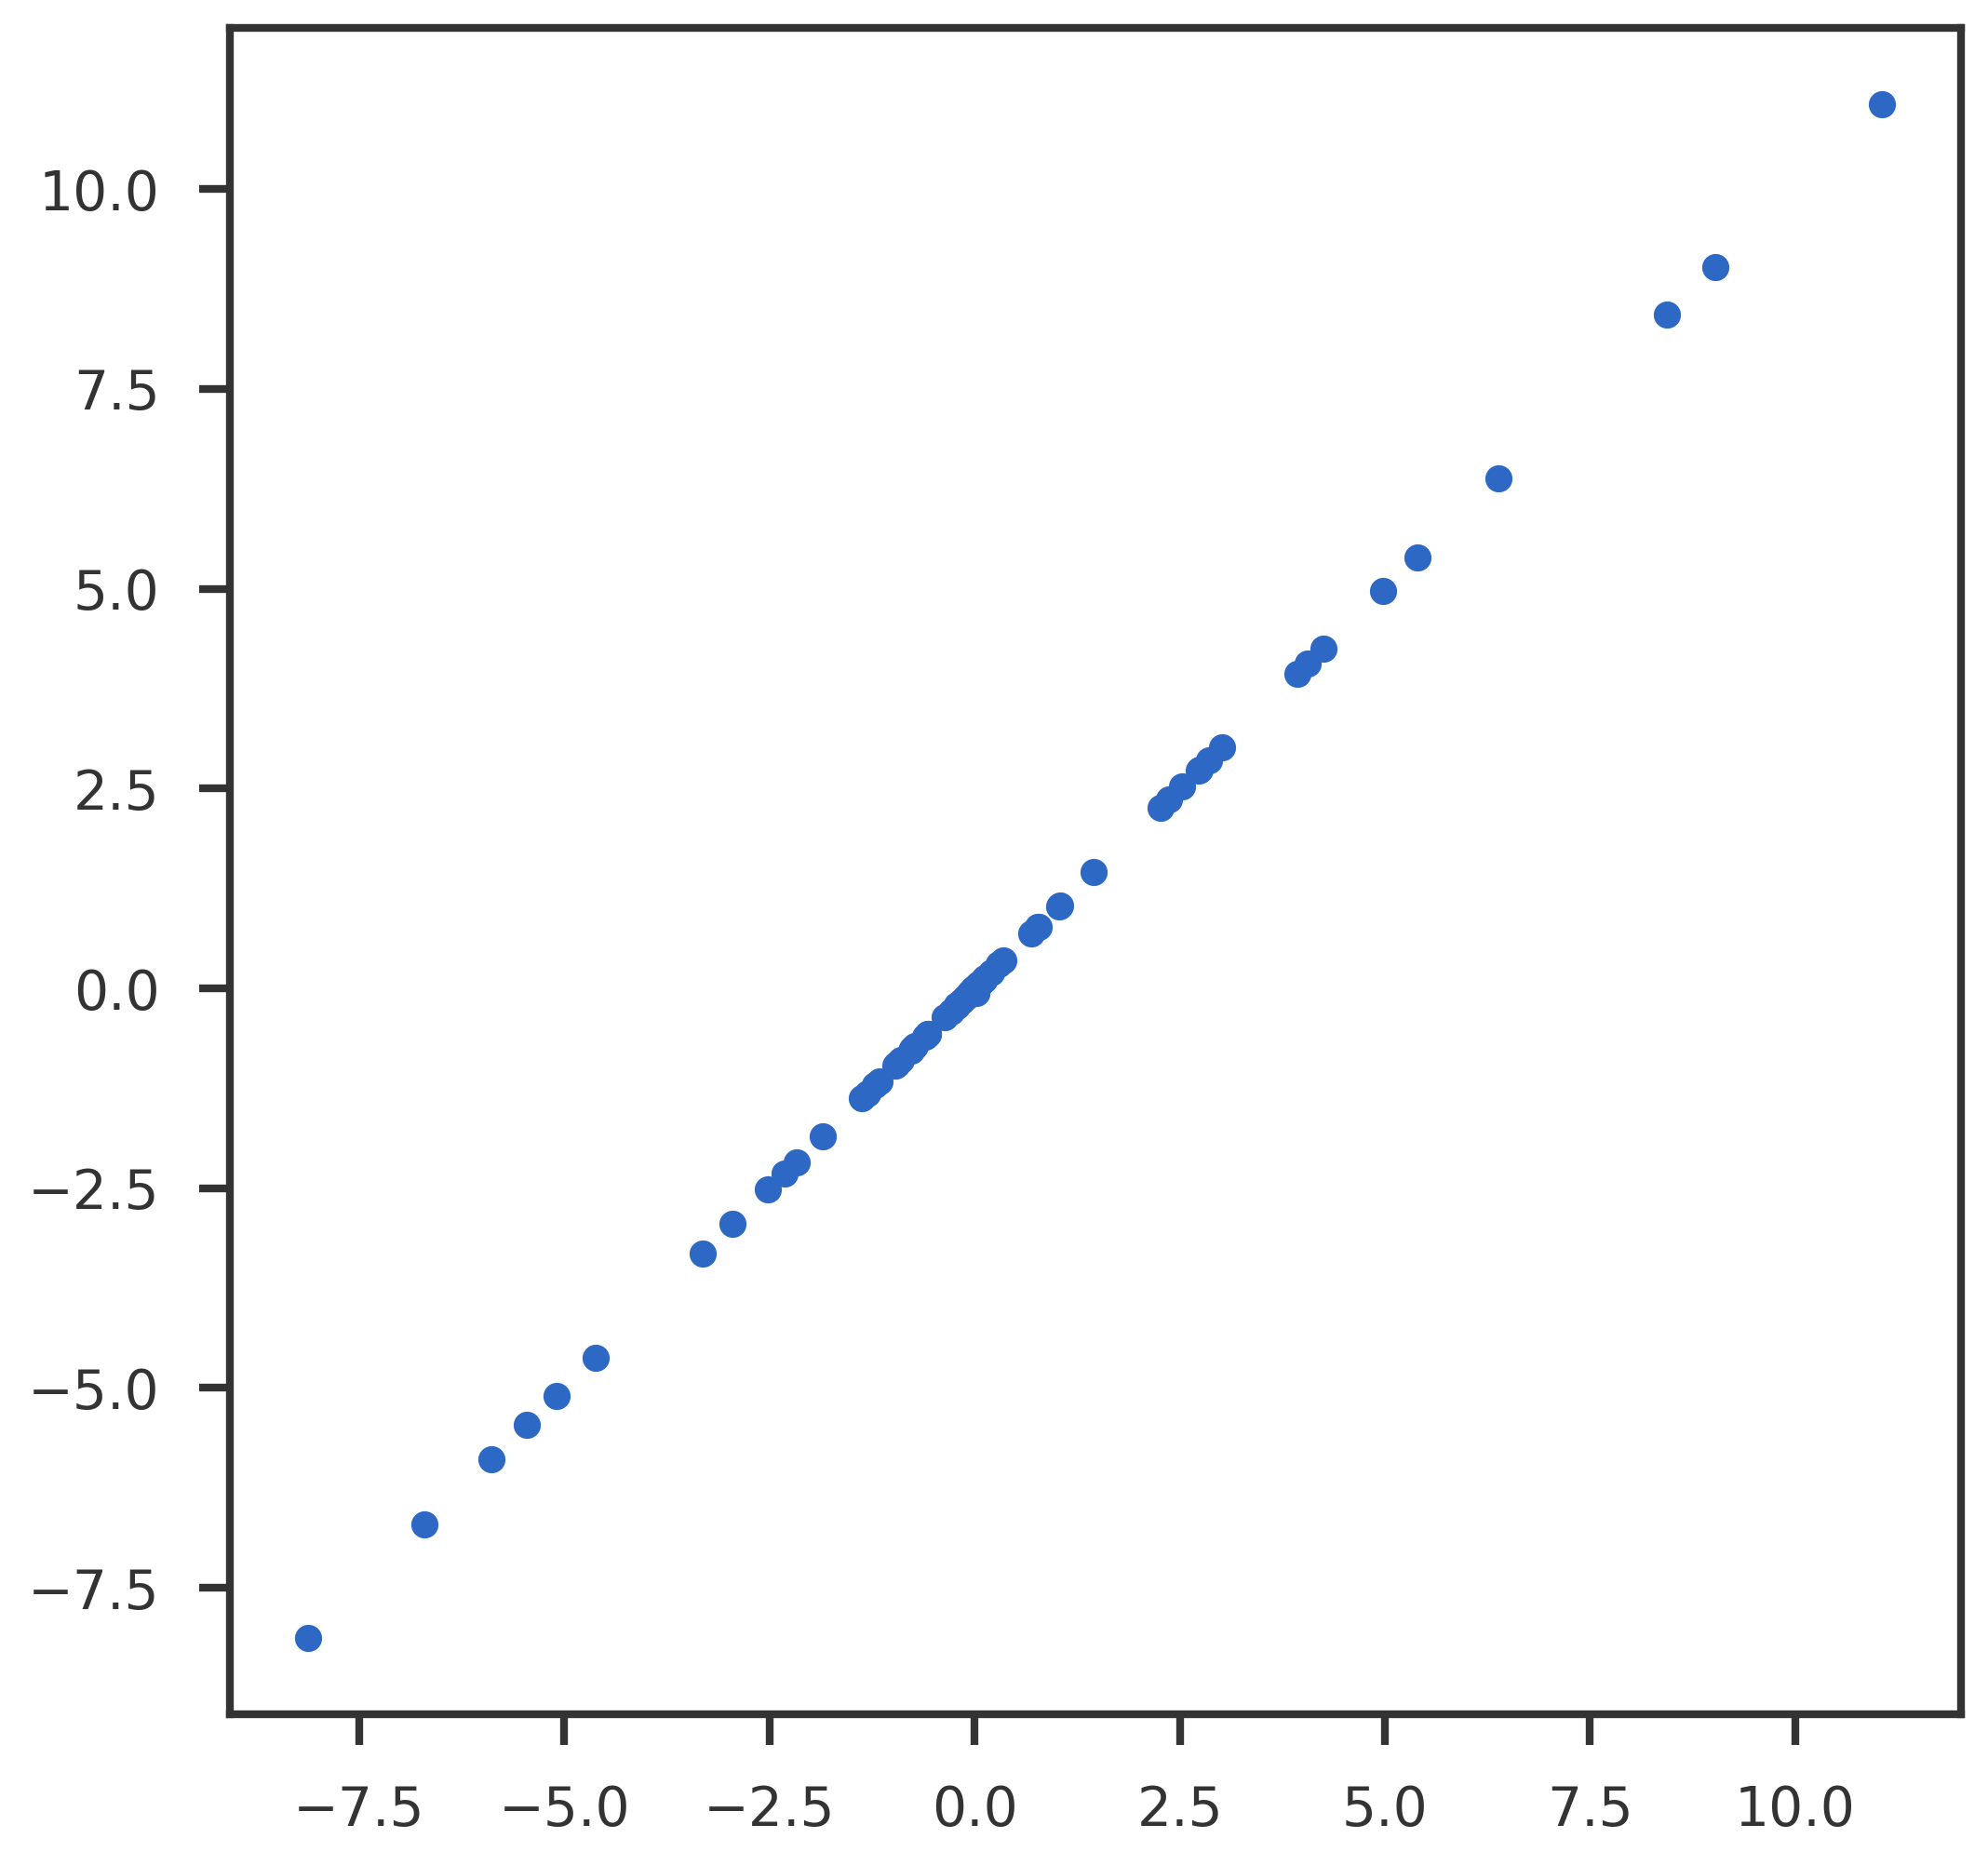

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(b, znew._binvobj.fun + b)
#ax1.hist(znew._binvobj.fun)
plt.show()

In [13]:
def _rootfind_zero_func(x, b, prior, sj2, scale, dj): 
    nm = NormalMeans.create(x, prior, sj2, scale = scale, d = dj)
    fx = nm.shrinkage_operator(jac = False)
    return fx - b

In [14]:
from gradvi.inference.root_find import vec_root

x0 = np.zeros(n)

vec_root(_rootfind_zero_func, x0, args = (b, prior, sj2, s2, dj),
         method = 'trisection', bracket = bracket, 
         options = {'full_output': True}
        )

     fun: array([ 6.27526597e-09, -1.29276106e-08,  8.85862850e-09, -1.25142673e-08,
       -7.40902817e-09,  8.36871186e-09, -9.50993262e-09, -5.36488931e-09,
        1.06373373e-08,  9.89457094e-09,  9.72547687e-09,  5.67941860e-09,
        5.22636512e-09, -7.10511416e-09,  8.42397530e-09, -1.11333957e-08,
        1.32599272e-08,  1.03428849e-08, -9.37901374e-09,  1.41133212e-08,
       -9.79954606e-09, -1.44642458e-08,  1.07339533e-08, -1.17460736e-08,
       -9.72069314e-09,  1.09600679e-08, -1.13936451e-08,  1.35835887e-08,
       -9.40861122e-09,  1.33747433e-08,  5.77816017e-09,  1.22195454e-08,
        7.60094343e-09,  8.61968141e-09, -1.24265160e-08,  1.26426991e-08,
        1.09777565e-08,  7.13950524e-09, -9.25882826e-09,  7.79037242e-09,
       -1.00038163e-08, -7.45615092e-09, -6.02120642e-09,  1.33579316e-08,
       -6.94879754e-09, -7.28532863e-09, -9.07148845e-09,  1.29986207e-08,
       -8.97705562e-09,  5.99505567e-09,  8.60607696e-09,  8.83571083e-09,
        8.57638

In [55]:
z[62]

-0.08164839975800467

In [56]:
b[62]

-0.017935696423150363

In [57]:
znew._binvobj.x[62]

0.17277456364420743

In [58]:
bracket[0][62]

-0.09958409618115503

In [59]:
bracket[1][62]

-0.0637127033348543